<a href="https://colab.research.google.com/github/SeongYunHong/Mirae-Python_Machine_Learning/blob/main/16_decomposition_manifold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

고유값 분해(eig)와 특이행렬분해(svd)의 차이

svd(singular value decomposition) : 비정방행렬 -> 특성추출(PCA와 비슷)
TruncatedSVD

In [ ]:
import numpy as np
from scipy import linalg
A=np.array([[1,2,3],[4,5,6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
M,N=A.shape
M,N

(2, 3)

In [ ]:
U,s,Vh=linalg.svd(A) #U, Vh는 정직교 행렬
s #2x3

array([9.508032  , 0.77286964])

In [ ]:
U.shape, s.shape, Vh.shape #선형대수는 복원이 가능

((2, 2), (2,), (3, 3))

In [ ]:
Vh #고유값 분해의 고유벡터와 같은 역할

array([[-0.42866713, -0.56630692, -0.7039467 ],
       [ 0.80596391,  0.11238241, -0.58119908],
       [ 0.40824829, -0.81649658,  0.40824829]])

In [ ]:
Sig=linalg.diagsvd(s,M,N) #차수
Sig

array([[9.508032  , 0.        , 0.        ],
       [0.        , 0.77286964, 0.        ]])

In [ ]:
U.dot(Sig.dot(Vh)) #복원

array([[1., 2., 3.],
       [4., 5., 6.]])

In [ ]:
#PCA(Principal Component Analysis 주성분 분석)
#TruncatedSVD 희소행렬이 가지고 있는 0부분을 제외하고 진행 : 희소행렬
#TM : text mining, text는 희소행렬 : classifiction 분류, topic analysis(토픽분석)
#단어를 열 이름으로
#Document Term Matrix(DTM), Term Document Matrix(TDM)
#LSA(latent semantic(어의(의미)) analysis) -> topic analysis
#tf-idf text frequency (도수 ; 카운트) inverse document frequency
#모든 문서에 다 등장 : 중요하지 않은 단
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np
np.random.seed(0)
X_dense=np.random.rand(100,100) #차원 축소
X_dense[:,2*np.arange(50)]=0 #희소행렬로 만들려고 열을 2칸씩 건너뛰면서 0으로 만듦
print(X_dense)
X=csr_matrix(X_dense)
svd=TruncatedSVD(n_components=5,n_iter=7,random_state=42)
svd.fit(X)
print("분산 설명 : ",svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum()) #21%를 5개의 특징이 설명
print(svd.singular_values_) #중간에 있는 값

[[0.         0.71518937 0.         ... 0.02010755 0.         0.00469548]
 [0.         0.27000797 0.         ... 0.25435648 0.         0.43441663]
 [0.         0.69634349 0.         ... 0.86219152 0.         0.96083466]
 ...
 [0.         0.26867428 0.         ... 0.5736796  0.         0.22519844]
 [0.         0.73882539 0.         ... 0.94836806 0.         0.1419334 ]
 [0.         0.19701397 0.         ... 0.75842952 0.         0.81357508]]
분산 설명 :  [0.01570766 0.05122679 0.04998062 0.04795064 0.04539933]
[0.01570766 0.05122679 0.04998062 0.04795064 0.04539933]
0.21026503465070345
[35.24105443  4.5981613   4.54200434  4.44866153  4.32887456]


In [ ]:
#CNN(이미지), RNN(recurrent neural network 순서가 있는 데이터 : 시계열, tm)
#RNN -> LSTM -> seq2seq번역 -> transformer -> LLM(large language model):GPT
from sklearn.datasets import load_digits
digits=load_digits()
svd=TruncatedSVD(n_components=10)
X_transformed=svd.fit_transform(digits.data)
X_transformed.shape

(1797, 10)

In [ ]:
#kmeans 복습
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns

iris=datasets.load_iris()
X=iris.data[:,:2]
y_iris=iris.target

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist #거리값을 구하는 함수 : cdist
import matplotlib.pyplot as plt
#원래 데이터 라벨 : 3
def plot_kmeans(kmeans, X,n_clusters=4,rseed=0,ax=None):
  labels=kmeans.fit_predict(X) #예측 : 군집을 예측해줌 : 종속변수를 결정하는 것처럼
  ax=ax or plt.gca()
  ax.axis('equal')
  ax.scatter(X[:,0],X[:,1],c=labels, s=40, cmap='viridis',zorder=2)
  centers=kmeans.cluster_centers_
  radii=[cdist(X[labels==i],[center]).max() #가장 큰 반지름을 기준으로
   for i, center in enumerate(centers)] #list 안에 for 문이 들어있는 형식 : list comprehension
  for c,r in zip(centers,radii):
    #foreground color : 전경색, edge color
    #CC 16 x 12 + 12 A:10, B:11, C:12, D:13, E:14, F:15  #data mapping
    #204
    #lw(line width) : 선 굵기
    #alpha  : 투명도
    #zorder : 레이어 순서 : 동일한 위치에 여러장을 출력할 때(zorder 순서대로 출력됨(1부터))
    ax.add_patch(plt.Circle(c,r,fc='#CCCCCC',ec='#FF0000',lw=3,alpha=0.5,zorder=1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


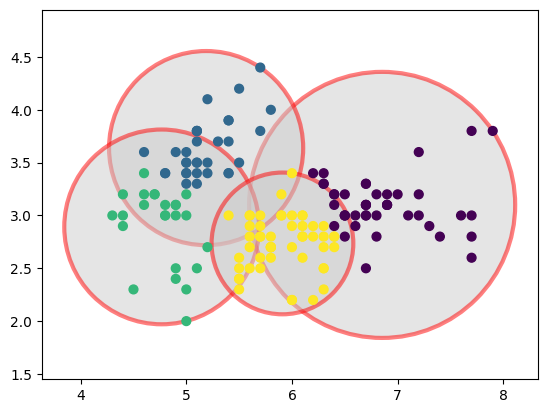

In [ ]:
kmeans=KMeans(n_clusters=4,random_state=0)
plot_kmeans(kmeans,X)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
(150, 5)
(150, 2)


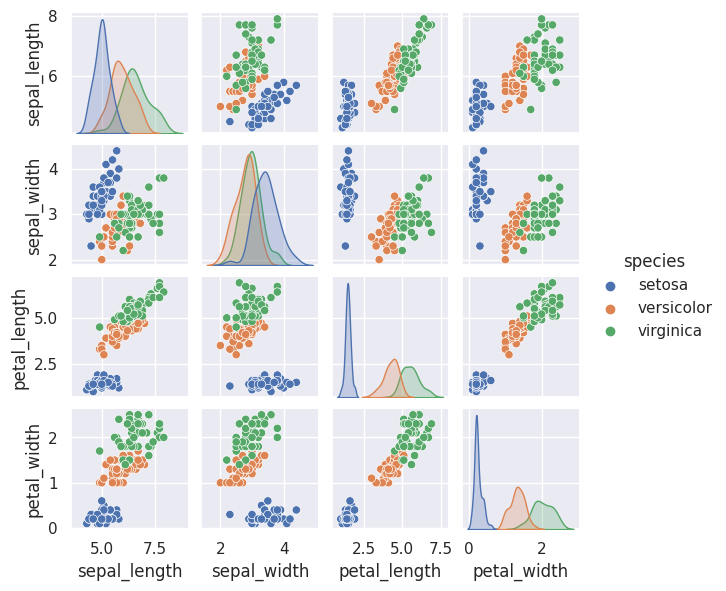

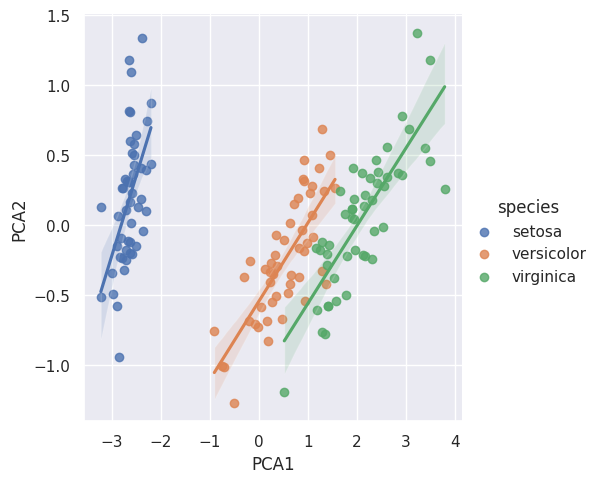

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
iris=sns.load_dataset("iris")
print(iris.head())
print(iris.shape) #150x5
sns.pairplot(iris,hue='species',height=1.5)
X_iris=iris.iloc[:,:4]
from sklearn.decomposition import PCA
#150x4 -> 고유벡터 사이즈 : 4x4 => 4x2
#150x4  @ 4x2 => 150x2 #앞에 있는 4개의 변수가 다 참여해서 2개의 새로운 변수를 만든 것
#데이터 손실 없음
model=PCA(n_components=2) #주성분 2개만 선택
model.fit(X_iris)
X_2D=model.transform(X_iris)
print(X_2D.shape) #150x2
iris['PCA1']=X_2D[:,0]
iris['PCA2']=X_2D[:,1]
#lm : linear model 회귀 모델
#데이터의 species마다 다른 선형회귀 구현
sns.lmplot(x="PCA1",y="PCA2",hue='species',data=iris, fit_reg=True)
plt.show()

In [ ]:
import numpy as np
np.random.seed(4)
m=60
w1,w2=.1,.3
noise=.1
angles=np.random.rand(m)*3*np.pi/2-0.5
X=np.empty((m,3))
X[:,0]=np.cos(angles) + np.sin(angles)/2 + noise*np.random.randn(m)/2
X[:,1]=np.sin(angles)*0.7 + noise*np.random.randn(m)/2
X[:,2]=X[:,0]*w1 + X[:,1]*w2 + noise*np.random.randn(m)
print('X.shape : ',X.shape)

X.shape :  (60, 3)


In [ ]:
import pandas as pd
df=pd.DataFrame(X,columns=['$X_1$','$X_2$','$X_3$'])
df.head(10)

,$X_1$,$X_2$,$X_3$
0,-1.015700,-0.550913,-0.261326
1,-0.007717,0.599586,0.035078
2,-0.953171,-0.464537,-0.249203
3,-0.920123,0.210096,0.021824
4,-0.763097,0.158261,0.191525
5,1.118161,0.325087,0.317106
6,-1.022589,-0.643841,-0.133687
7,0.673520,-0.273425,-0.007878
8,1.016196,0.515466,0.467833
9,0.549577,0.677280,0.234016


In [ ]:
#문제
#열 평균을 구하시오
print("열 평균 : ",X.mean(axis=0))

#공분산을 구하시오
X_cen=X-X.mean(axis=0)
print(X_cen.shape)
X_cov=np.dot(X_cen.T,X_cen)/59 # /59 : n-1
print("공분산\n",X_cov)

열 평균 :  [0.02406745 0.20932515 0.07155422]
(60, 3)
공분산
 [[0.69812855 0.17640539 0.12137931]
 [0.17640539 0.1801727  0.07253614]
 [0.12137931 0.07253614 0.04552382]]


In [ ]:
#고유값 분해 : 정방행렬에만 사용가능
w,v=np.linalg.eig(X_cov) #고유값 분해
print('eigenvalue : ',w) #고유치(자동 정렬됨)
print('eigenvector\n',v) #고유벡터

eigenvalue :  [0.77830975 0.1351726  0.01034272]
eigenvector
 [[ 0.93636116  0.34027485 -0.08626012]
 [ 0.29854881 -0.90119108 -0.31420255]
 [ 0.18465208 -0.2684542   0.94542898]]


In [ ]:
print("설명력 : ",w/w.sum()) #설명력 : 고유치 / 고유치의 총합

설명력 :  [0.84248607 0.14631839 0.01119554]


In [ ]:
#SVD는 비정방행렬에 사용 가능(정방행렬에도 사용가능)
U,D,V_t=np.linalg.svd(X_cen)
print(U.shape,D.shape,V_t.shape)
D #고유치와 같은 의미

(60, 60) (3,) (3, 3)


array([6.77645005, 2.82403671, 0.78116597])

In [ ]:
print("explained variance ratio :",D**2/np.sum(D**2))

explained variance ratio : [0.84248607 0.14631839 0.01119554]


In [ ]:
V_t.T #가운데만 부호차이나고 나머지는 고유벡터랑 같음

array([[ 0.93636116, -0.34027485, -0.08626012],
       [ 0.29854881,  0.90119108, -0.31420255],
       [ 0.18465208,  0.2684542 ,  0.94542898]])

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

In [ ]:
print('singular value : ',pca.singular_values_)
print('singular vector\n',pca.components_.T)

singular value :  [6.77645005 2.82403671 0.78116597]
singular vector
 [[-0.93636116  0.34027485 -0.08626012]
 [-0.29854881 -0.90119108 -0.31420255]
 [-0.18465208 -0.2684542   0.94542898]]


In [ ]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
print(cumsum)
d=np.argmax(cumsum >= .85)+1
print('선택할 차원 수 : ',d)

[0.84248607 0.98880446 1.        ]
선택할 차원 수 :  2


In [ ]:
pca=PCA(n_components=0.95) #n_components를 소수점으로 쓰면 누적 확률을 의미
X_proj=pca.fit_transform(X)
pca.components_.T

array([[-0.93636116,  0.34027485],
       [-0.29854881, -0.90119108],
       [-0.18465208, -0.2684542 ]])

In [ ]:
import tensorflow as tf
tf.__version__ #2.14.0 #keras를 메인 모델로해서 구현해놨음

'2.14.0'

In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
(train_x,train_y),(test_x,test_y)=mnist.load_data()

In [ ]:
#28x28 이미지 사이즈
train_x.shape #(60000, 28, 28) #흑백이미지(컬러이미지라면 장수까지 4차원)

(60000, 28, 28)

In [ ]:
#784
#60000,784
#CNN(원래 이미지사이즈에서 특징을 추출), RNN => 전단계에서 특징을 추출(시계열 데이터, 텍스트 데이터 특징 추출)
train_x=train_x.reshape(-1,28*28) #fully-connected FFNN(feed forward neural network : 전진망)
pca=PCA(n_components=0.95) #누적 설명력이 95% 초과하면 drop
X_reduced=pca.fit_transform(train_x)
print(pca.n_components_) #784 => 154

154


In [ ]:
train_x.shape

(60000, 784)

In [ ]:
X_reduced.shape #고유벡터에 재표현된 데이터

(60000, 154)

In [ ]:
pca.components_.shape

(154, 784)

In [ ]:
(train_x @ pca.components_.T).shape # == X_reduced.shape

(60000, 154)

In [ ]:
#문제
#reduced(60000x154)를 원본 데이터로 복원하시오
X_recovered = pca.inverse_transform(X_reduced) # == X_reduced @ pca.components_
X_recovered

array([[ 2.64687454e-14, -5.81302016e-13, -1.79499509e-13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.64609603e-15, -1.67996410e-13, -5.11041518e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.28377776e-15,  8.10470042e-14, -9.30589413e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 8.88183138e-15, -1.81564119e-13,  6.04953780e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.07364675e-16,  4.46563152e-14, -5.45605406e-15, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.73667409e-15,  2.11325954e-14,  1.25009063e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
X_reduced @ pca.components_

array([[ 2.64687454e-14, -5.81302016e-13, -1.79499509e-13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.64609603e-15, -1.67996410e-13, -5.11041518e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.28377776e-15,  8.10470042e-14, -9.30589413e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 8.88183138e-15, -1.81564119e-13,  6.04953780e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.07364675e-16,  4.46563152e-14, -5.45605406e-15, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.73667409e-15,  2.11325954e-14,  1.25009063e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
X_recovered.shape

(60000, 784)

In [ ]:

import matplotlib
def plot_digits(instances, image_per_row=5,**options):
  size=28
  images_per_row=min(len(instances),image_per_row) #선택
  images=[instance.reshape(size,size) for instance in instances]
  n_row=(len(instances)-1) // images_per_row+1 #행수를 결정
  row_images=[] #행 이미지를 담을 그릇
  n_empty=n_row*images_per_row-len(instances) #30
  images.append(np.zeros((size,size*n_empty))) #빈 공간 이미지를 채움
  for row in range(n_row): #한 행씩 이미지 생성
    rimages=images[row*images_per_row : (row+1) * images_per_row] #0:5
    row_images.append(np.concatenate(rimages,axis=1)) #5개의 이미지를 한개로
  image=np.concatenate(row_images,axis=0) #행으로 합쳐사하멸
  plt.imshow(image,cmap=matplotlib.cm.binary, **options)
  plt.axis('off')

In [ ]:
train_x[0].shape #fully-connected => 이미지 사이즈(28x28)로 변환

(784,)

Text(0.5, 1.0, 'no noise')

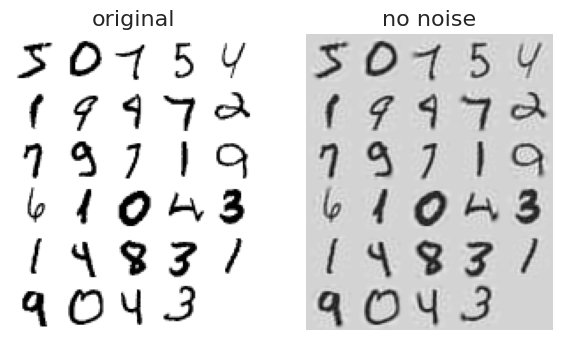

In [ ]:
import numpy as np
plt.figure(figsize=(7,4))
plt.subplot(121)
plot_digits(train_x[::2100])
plt.title('original',fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title('no noise',fontsize=16)
#784의 변수, 154 -> 784로

28.571428571428573

In [ ]:
#MDS
import numpy as np
import seaborn as sns; sns.set()
def make_hello(N=1000,rseed=42):
  fig, ax=plt.subplots(figsize=(4,1))
  fig.subplots_adjust(left=0,right=1,bottom=0,top=1) #공간지정
  ax.axis('off')
  #vertical align, horizontal align
  ax.text(0.5,0.4,'HELLO',va='center',ha='center',weight='bold',size=85)
  fig.savefig('hello.png')
  plt.close(fig)



  from matplotlib.image import imread
  data=imread('hello.png')[::-1,:,0].T #역순 : 사진을 좌우가 뒤집혀 있음
  print("이미지 차원",data.shape) #400x100
#행렬(행(높이), 열(넓이))
#이미지는 가로 사이즈를 먼저 지정 * 높이를 지정

  print(data)
  rng=np.random.RandomState(rseed)
  X=rng.rand(4*N,2) #4000x2
  print("만든 개수",X.shape)
  print((X*data.shape).shape) #(4000x2) * (400x100) -> 이미지 확대
  i,j=(X*data.shape).astype(int).T #좌표 위치
#흰색 (RGB 1 1 1)
#검정색 (RGB 0 0 0) 색이 없으면 검쟁색
  mask=(data[i,j]<1) #글씨
  X=X[mask]
  print("새로운 X개수 : ",X.shape) #글씨 위치만 뽑힘(1784,2)
  X[:,0] *= (data.shape[0] / data.shape[1])
  X=X[:N] #1000개만 뽑음
  return X[np.argsort(X[:,0])] #정렬

이미지 차원 (400, 100)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
만든 개수 (4000, 2)
(4000, 2)
새로운 X개수 :  (1784, 2)


<ipython-input-101-8adc7fbe6c38>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colorize=dict(c=X[:,0],cmap=plt.cm.get_cmap('rainbow',5))


(-0.19972965643412033,
 4.195346643588747,
 0.02244321091604335,
 0.990457146590137)

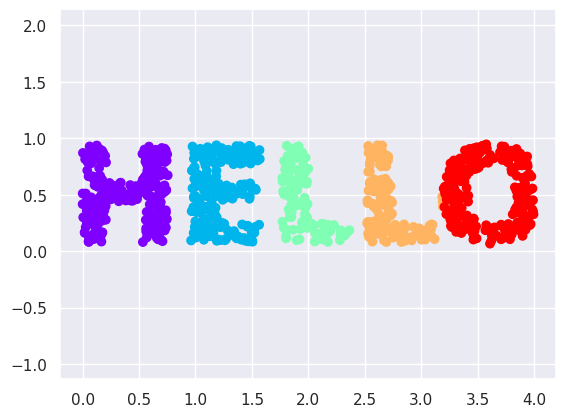

In [ ]:
X=make_hello(1000)
colorize=dict(c=X[:,0],cmap=plt.cm.get_cmap('rainbow',5))
plt.scatter(X[:,0],X[:,1],**colorize)
plt.axis('equal')

(1000, 2)
<class 'list'>


(4.507487053249943, 8.845503039218586, 4.991879306174322, 7.269254509788998)

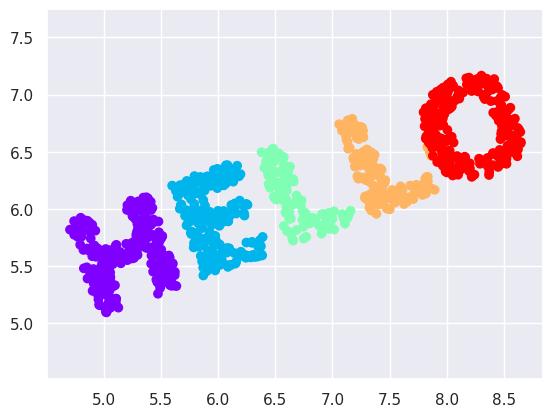

In [ ]:
print(X.shape)
def rotate(X,angle):
  theta=np.deg2rad(angle)
  R=[[np.cos(theta),np.sin(theta)],
     [-np.sin(theta), np.cos(theta)]]
  print(type(R))
  return np.dot(X,R)
X2=rotate(X,20)+5
plt.scatter(X2[:,0],X2[:,1],**colorize)
plt.axis('equal')

In [ ]:
from sklearn.metrics import pairwise_distances
D=pairwise_distances(X) #거리행렬
print(D.shape)
D[:5,:5] #대칭행

(1000, 1000)


array([[0.        , 0.09456459, 0.45411046, 0.11688862, 0.25021892],
       [0.09456459, 0.        , 0.35954588, 0.21138485, 0.34459142],
       [0.45411046, 0.35954588, 0.        , 0.57087538, 0.70387239],
       [0.11688862, 0.21138485, 0.57087538, 0.        , 0.13339179],
       [0.25021892, 0.34459142, 0.70387239, 0.13339179, 0.        ]])

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


[[-1.73423439 -0.81745868]
 [-1.689606   -0.90184291]
 [-1.5207988  -1.22000565]
 ...
 [ 1.81414877  1.00868682]
 [ 1.76758478  1.09837085]
 [ 1.75972301  1.12145007]]


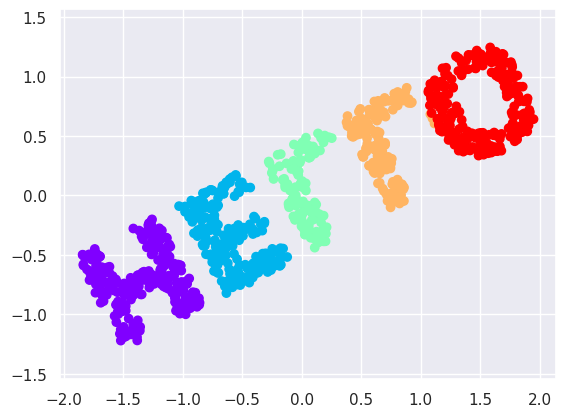

In [ ]:
from sklearn.manifold import MDS
#dissimilarity='precomputed' : 미리 계산된 거리값을 이용한다.
#내부적으로 임의행렬을 만들어서 차원축소

model=MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out=model.fit_transform(D)
plt.scatter(out[:,0],out[:,1],**colorize)
plt.axis('equal')
print(out)

In [ ]:
#행렬 거듭제곱(행렬 * 전치행렬) 후 고유값 분해를 하면 정상적으로 분해됨
rng=np.random.RandomState(10)
C=rng.randn(3,3)
print(np.dot(C,C.T)) #행렬의 거듭제곱 : 정방행렬, 대칭행렬
e,V=np.linalg.eigh(np.dot(C,C.T)) #고유값 분해
print(np.dot(V[0],V[1])) #정직교

[[4.67300869 1.54608517 0.42456214]
 [1.54608517 0.9046519  0.0621289 ]
 [0.42456214 0.0621289  0.0822976 ]]
5.551115123125783e-17


In [ ]:
#3차원으로 데이터 변환
def random_projection(X,dimension=3,rseed=42):
  assert dimension >= X.shape[1] #X.shape[1] : 열
  rng=np.random.RandomState(rseed)
  C=rng.randn(dimension, dimension) #3x3
  print("C는 ",C.shape)
  print(np.dot(C,C.T)) #정방행렬, 대칭행렬
  e,V=np.linalg.eigh(np.dot(C,C.T)) #고유값 분해 - 정직교 행렬
  print("V는 ",V.shape)
  print("차원은 ",V[:X.shape[1]]) #행이 2개
  return np.dot(X,V[:X.shape[1]])
print(X.shape) #1000x2 2x3
print(X.shape[1]) #2
print("데이터의 차원은 ",X.shape)
X3=random_projection(X,3)
X3.shape

(1000, 2)
2
데이터의 차원은  (1000, 2)
C는  (3, 3)
[[0.68534241 0.63723771 0.37423535]
 [0.63723771 2.42926786 2.33541214]
 [0.37423535 2.33541214 3.30327538]]
V는  (3, 3)
차원은  [[-0.63360361  0.75939282  0.14788172]
 [ 0.64803399  0.41652241  0.63762139]]


(1000, 3)

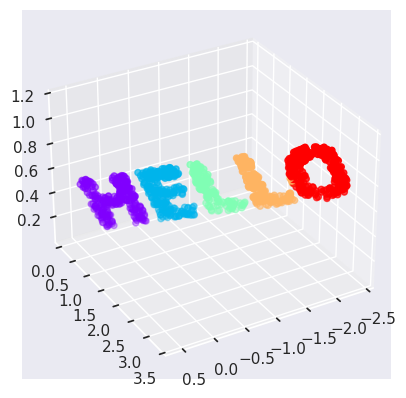

In [ ]:
from mpl_toolkits import mplot3d
ax=plt.axes(projection='3d')
ax.scatter3D(X3[:,0],X3[:,1],X3[:,2],**colorize)
ax.view_init(azim=60,elev=30)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(-2.0314683289212114,
 2.1390500907532832,
 -1.3432561900442952,
 1.3682556159800632)

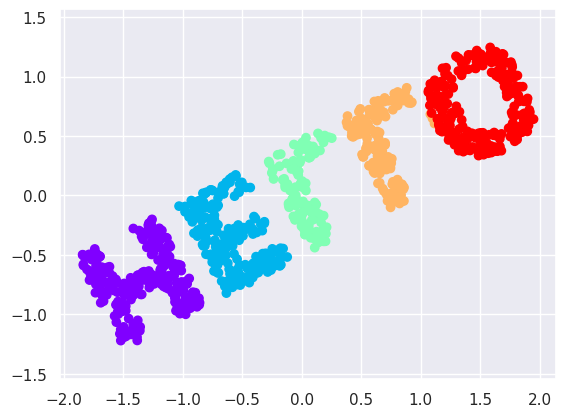

In [ ]:
model=MDS(n_components=2,random_state=1) #차원축소
out3=model.fit_transform(X3)
plt.scatter(out3[:,0],out3[:,1],**colorize)
plt.axis('equal')

In [ ]:
#비선형 변환
def make_hello_s_curve(X):
  t=(X[:,0]-2)*0.75*np.pi
  x=np.sin(t)
  y=X[:,1]
  z=np.sign(t) * (np.cos(t)-1)
  return np.vstack((x,y,z)).T
XS=make_hello_s_curve(X)

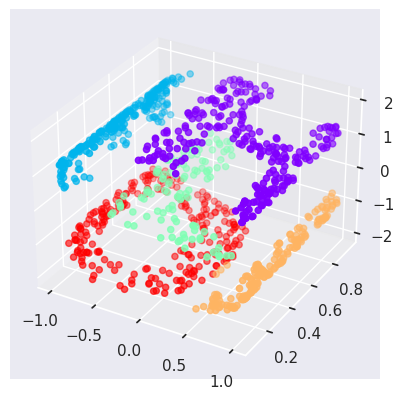

In [ ]:
ax=plt.axes(projection='3d')
ax.scatter3D(XS[:,0],XS[:,1],XS[:,2],**colorize)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(-1.7542649693704555,
 1.7171533174441027,
 -2.253133416776031,
 2.0016781872998273)

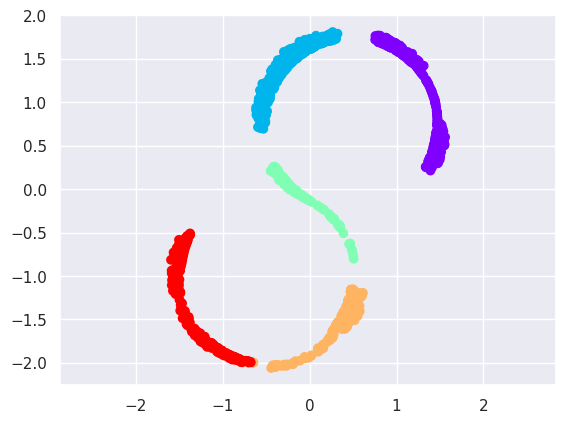

In [ ]:
#MDS는 비선형 차원축소에 취약함 : 선형에만 적용
model=MDS(n_components=2, random_state=2)
outS=model.fit_transform(XS)
plt.scatter(outS[:,0],outS[:,1],**colorize)
plt.axis('equal')

(0.15, -0.15)

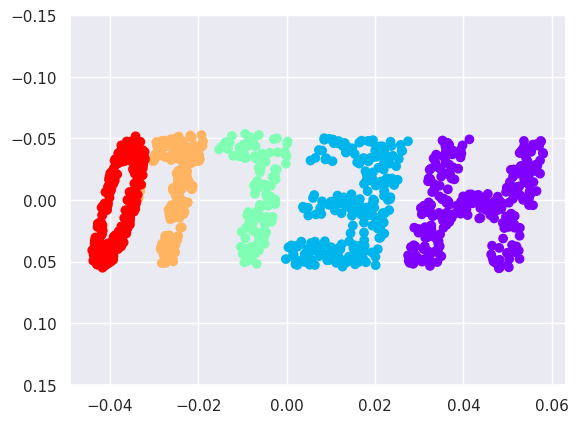

In [ ]:
#LLE : LocallyLinearEmbedding
#비선형에 적용 : Linear 간격을 유지
from sklearn.manifold import LocallyLinearEmbedding
model=LocallyLinearEmbedding(n_neighbors=100,n_components=2,method='modified',eigen_solver='dense') #100개 내부에 있는 직선거리는 유지하면서 차원 축소
out=model.fit_transform(XS)
fig,ax=plt.subplots()
ax.scatter(out[:,0],out[:,1],**colorize)
ax.set_ylim(0.15,-0.15)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


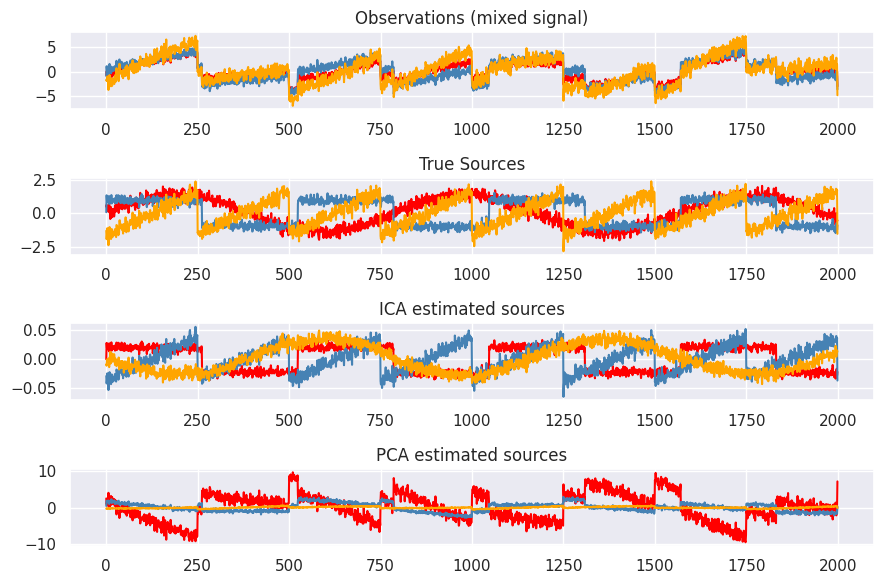

In [ ]:
#FasfICA(Independent Component Analysis)
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA, PCA
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)
s1 = np.sin(2 * time)
s2 = np.sign(np.sin(3 * time))
s3 = signal.sawtooth(2 * np.pi * time)
S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)
S /= S.std(axis=0)
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])
X = np.dot(S, A.T)
#위는 데이터를 생성하는 부분

ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)
A_ = ica.mixing_
pca = PCA(n_components=3)
H = pca.fit_transform(X)
plt.figure(figsize=(9, 6))
models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA estimated sources',
         'PCA estimated sources']
colors = ['red', 'steelblue', 'orange']
for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()

In [ ]:
#NMF(양수 : text mining, image(0~255), sound 데이터)

In [ ]:
#meta-estimator(앙상블 학)
#PCR(principal component regression)
#통계 모형 : 공분산 : PLS() : partial least square regression